# Predicting Housing Sale Prices in Ames, Iowa

###### Group 6: Chris Holt, Lawrence Ferretti, Julian Freeman, Courtenay Gray, Jason Ree, Jamie Thorpe

----




### Project Description
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, our goal is to investigate 5 housing characteristics' impact on sale prices, and to find the best model to predict the sales price of homes.


### Research Question
What housing characteristics affect the price of a home most significantly?

Ho: The following housing characteristics have no effect on housing prices in Ames, Iowa.

* Year remodeled
* Lot area
* Living area sq ft
* Total basement sq ft
* Overall quality 

Ha: The above housing characteristics have an effect on housing prices in Ames, Iowa.

### Datasets

80 Columns x 1460 Rows of housing sales data from years 2006 to 2010

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

----

### Contents
* Data Observation
* Data Munging/Cleaning
* Data Analysis
* Predictive Model Construction
* Conclusion

In [1]:
# Dependencies and Setup
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats


#### Initial Observation
* 35 Numerical Columns
* 44 Categorical Columns
* 1460 Rows of data(Houses)

##### * Our selection of housing variables to analyze
* Based on intial review of the housing variables, the selected 5 variables seemed most intriguing and most impactful on sale prices based on intuition. 

##### * 5 Housing features and their description
1. Overall Quality: overall quality of materials/finish of the house (1-10 Rating Scale)

2. YearRemodAdd: the year the house was remodeled if no remodelling was performed then it is the same as year the house was built (YYYY)

3. TotalBsmtSF: total area of basement area (sqft)

4. GrLivArea: total area of livable (above ground) area (sqft)

5. LotArea: Lot size (sqft)


In [2]:
# Importing Data
data = pd.read_csv("train.csv")

# Model Data 5 house features
model_data = pd.DataFrame()
model_data["overallqual"] = data["OverallQual"]
model_data["yearremodadd"] = data["YearRemodAdd"]
model_data["totalbsmtsf"] = data["TotalBsmtSF"]
model_data["grlivarea"] = data["GrLivArea"]
model_data["lotarea"] = data["LotArea"] 
model_data["saleprice"] = data["SalePrice"]
model_data["ln_saleprice"] = np.log(data["SalePrice"])

# Initial observation of data
print(model_data.describe())

       overallqual  yearremodadd  totalbsmtsf    grlivarea        lotarea  \
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000   
mean      6.099315   1984.865753  1057.429452  1515.463699   10516.828082   
std       1.382997     20.645407   438.705324   525.480383    9981.264932   
min       1.000000   1950.000000     0.000000   334.000000    1300.000000   
25%       5.000000   1967.000000   795.750000  1129.500000    7553.500000   
50%       6.000000   1994.000000   991.500000  1464.000000    9478.500000   
75%       7.000000   2004.000000  1298.250000  1776.750000   11601.500000   
max      10.000000   2010.000000  6110.000000  5642.000000  215245.000000   

           saleprice  ln_saleprice  
count    1460.000000   1460.000000  
mean   180921.195890     12.024051  
std     79442.502883      0.399452  
min     34900.000000     10.460242  
25%    129975.000000     11.775097  
50%    163000.000000     12.001505  
75%    214000.000000     12.273731  
max    755

In [3]:
# Data Cleaning: Na / NaN searching
model_data_na = (model_data.isnull().sum() / len(model_data)) * 100
model_data_na = model_data_na.drop(model_data_na[model_data_na == 0].index).sort_values(ascending=False)[:79]
model_data_na_percentage = pd.DataFrame({'Missing %' : model_data_na})

# output % of data missing / column
model_data_na_percentage.head(10)

,Missing %


##### * *Note: It is interesting and important to note that none of the data from our target 5 housing characteristics have missing/NA/NaN values.*

### Data Observation of Sales Prices Distributions
----

##### * Histograms
* Sales Price vs. Frequency 
* Natural Log of Sales Price vs. Frequency

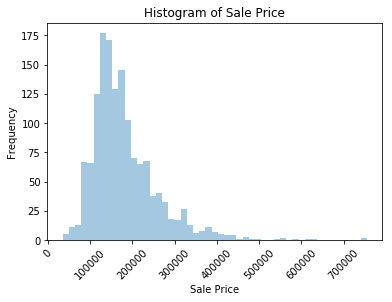

In [4]:
# Plot Histogram of Sales Price vs. Frequency
target = "saleprice"
sns.distplot(model_data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.savefig("histsp.png")
plt.show()

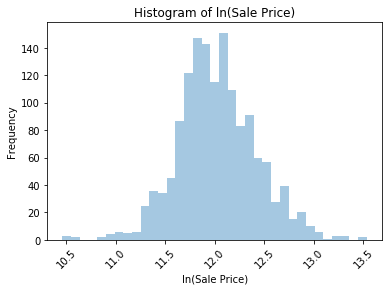

In [5]:
# Historgram of Natural Log of SalePrice
target = "ln_saleprice"
sns.distplot(model_data[target], kde= False)

# Histogram labeling/formatting
plt.xticks(rotation = 45)
plt.title("Histogram of ln(Sale Price)")
plt.xlabel("ln(Sale Price)")
plt.ylabel("Frequency")
plt.savefig("histln.png")
plt.show()

### One-way Plots

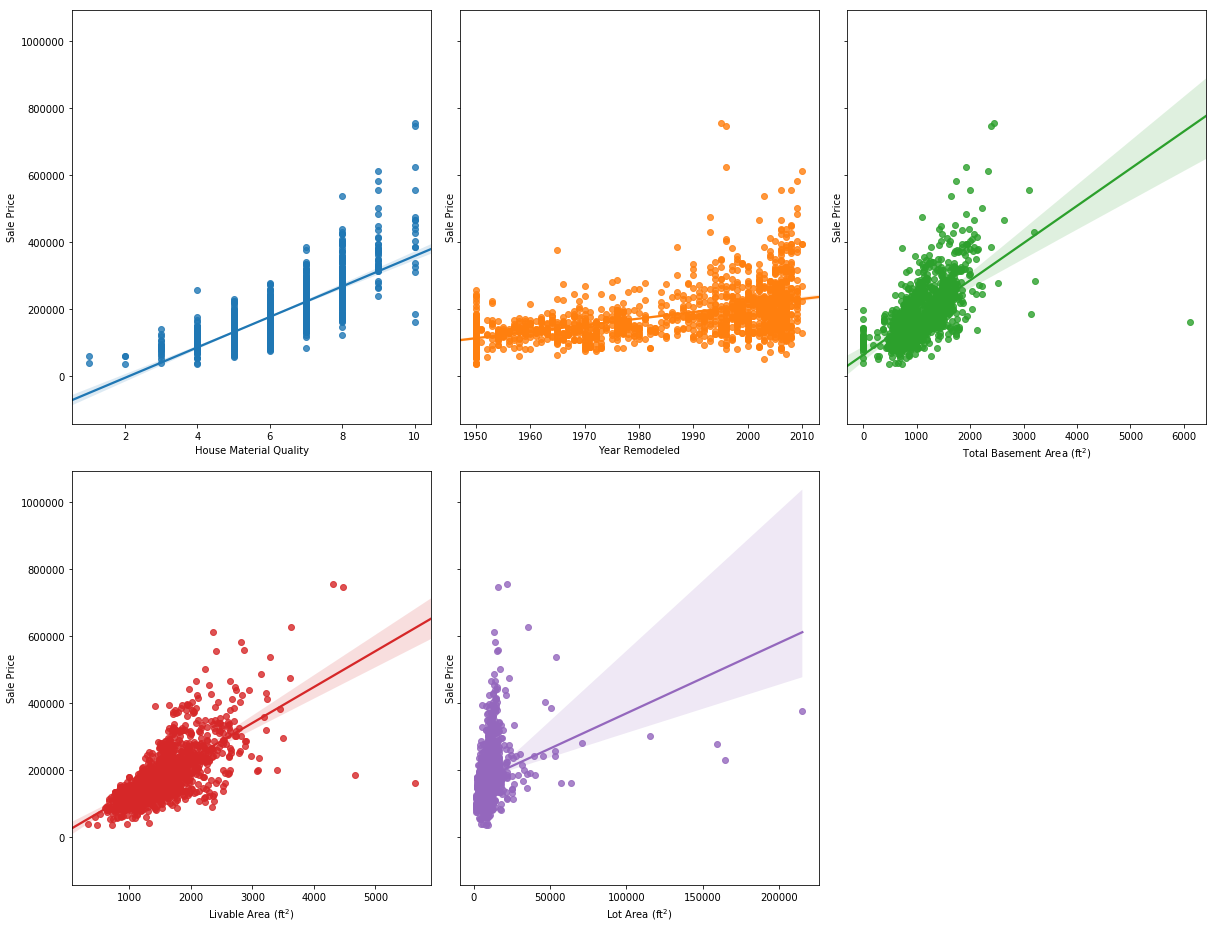

In [6]:
# Oneway plots of field vs. Sales Price
target = "saleprice"

# Isolating housing features relevant to Hypothesis
field1 = model_data.columns[0] # OverallQual: overall quality of materials/finish of house (1-10 rating)
field2 = model_data.columns[1] # YearRemodAdd: year remodeled
field3 = model_data.columns[2] # TotalBsmtSF: total basement area (sqft)
field4 = model_data.columns[3] # GrLivArea: livable area (sqft)
field5 = model_data.columns[4] # LotArea: lot area (sqft)

# Preparing X-Y for one-way plots
oneway1 = model_data[[field1,target]]
oneway2 = model_data[[field2,target]]
oneway3 = model_data[[field3,target]]
oneway4 = model_data[[field4,target]]
oneway5 = model_data[[field5,target]]

# Ploting 
oneway = [field1,field2,field3,field4,field5]
fig, ((ax1, ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(17,13),sharey = True)
sns.regplot(oneway1[field1], oneway1[target], ax = ax1)
sns.regplot(oneway2[field2], oneway2[target], ax = ax2)
sns.regplot(oneway3[field3], oneway3[target], ax = ax3)
sns.regplot(oneway4[field4], oneway4[target], ax = ax4)
sns.regplot(oneway5[field5], oneway5[target], ax = ax5, truncate = True)

# Plot axis labels and title
ax1.set_ylabel("Sale Price")
ax2.set_ylabel("Sale Price")
ax3.set_ylabel("Sale Price")
ax4.set_ylabel("Sale Price")
ax5.set_ylabel("Sale Price")

ax1.set_xlabel("House Material Quality")
ax2.set_xlabel("Year Remodeled")
ax3.set_xlabel("Total Basement Area (ft$^2$)")
ax4.set_xlabel("Livable Area (ft$^2$)")
ax5.set_xlabel("Lot Area (ft$^2$)")
ax6.axis('off')
plt.tight_layout()

# Saving plots of 5 features vs. sales price
plt.savefig("5plot.png")
plt.show()

### Model and Output Statistics

In [7]:
# Nomalize data
norm_data = pd.DataFrame()
norm_data = (model_data-model_data.mean()) / (model_data.max() - model_data.min())
norm_data["saleprice"] = model_data["saleprice"]
norm_data["ln_saleprice"] = model_data["ln_saleprice"]

print(norm_data.describe())

# Create formula (form1) for use in linear models
a = norm_data.columns[0]
b = norm_data.columns[1]
c = norm_data.columns[2]
d = norm_data.columns[3]
e = norm_data.columns[4]

# Formula 1 construction and string verification of house features involved
form1 = "saleprice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form2 = "ln_saleprice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

        overallqual  yearremodadd   totalbsmtsf     grlivarea       lotarea  \
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03   
mean   1.946692e-17  1.541119e-15  1.927206e-17 -1.614006e-17 -4.281262e-18   
std    1.536663e-01  3.440901e-01  7.180120e-02  9.899781e-02  4.665342e-02   
min   -5.665906e-01 -5.810959e-01 -1.730654e-01 -2.225817e-01 -4.308036e-02   
25%   -1.221461e-01 -2.977626e-01 -4.282806e-02 -7.271358e-02 -1.385089e-02   
50%   -1.103501e-02  1.522374e-01 -1.079042e-02 -9.695497e-03 -4.853248e-03   
75%    1.000761e-01  3.189041e-01  3.941416e-02  4.922500e-02  5.069863e-03   
max    4.334094e-01  4.189041e-01  8.269346e-01  7.774183e-01  9.569196e-01   

           saleprice  ln_saleprice  
count    1460.000000   1460.000000  
mean   180921.195890     12.024051  
std     79442.502883      0.399452  
min     34900.000000     10.460242  
25%    129975.000000     11.775097  
50%    163000.000000     12.001505  
75%    214000.000000     12.2

'saleprice ~ overallqual + yearremodadd + totalbsmtsf + grlivarea + lotarea'

In [8]:
# Ordinary Least Squares Model (Special Case of GLM)
# Sale Price Fit
model_ols = smf.ols(formula = form1, data = norm_data).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     917.5
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:17:28   Log-Likelihood:                -17504.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1454   BIC:                         3.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.809e+05   1021.735    177.073   

In [9]:
# Ordinary Least Squares Model (Special Case of GLM)
# Natural Log of Sale Price Fit
model_ln = smf.ols(formula = form2, data = norm_data).fit()
print(model_ln.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1125.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:17:29   Log-Likelihood:                 423.88
No. Observations:                1460   AIC:                            -835.8
Df Residuals:                    1454   BIC:                            -804.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.0241      0.005   2533.140   

Diff1 Minimum: -525,833.59
Diff1 Maximum: 287,646.66
Diff2 Minimum: -1,722,811.72
Diff2 Maximum: 222,264.23


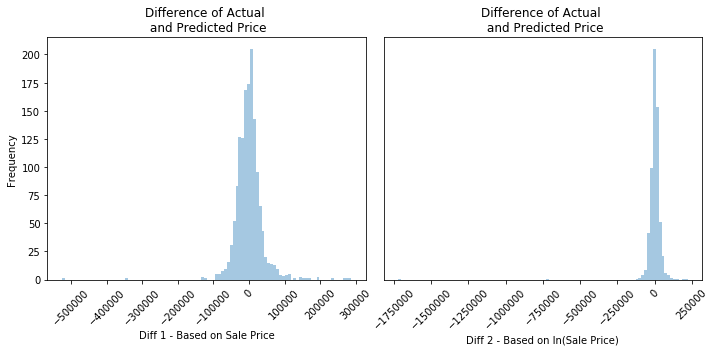

In [10]:
# Plot of the difference between Actual and Predicted
norm_data["Pred1"] = model_ols.predict()
norm_data["Diff1"] = norm_data["saleprice"] - norm_data["Pred1"]
norm_data["Pred2"] = np.exp(model_ln.predict())
norm_data["Diff2"] = norm_data["saleprice"] - norm_data["Pred2"]
print("Diff1 Minimum: " + "{:,.2f}".format(norm_data["Diff1"].min()))
print("Diff1 Maximum: " + "{:,.2f}".format(norm_data["Diff1"].max()))
print("Diff2 Minimum: " + "{:,.2f}".format(norm_data["Diff2"].min()))
print("Diff2 Maximum: " + "{:,.2f}".format(norm_data["Diff2"].max()))

bn = 100 #custom binning variable
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(norm_data["Diff1"], kde= False,bins=bn)
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.xlabel("Diff 1 - Based on Sale Price")
plt.title("Difference of Actual \n and Predicted Price")
plt.subplot(1,2,2)
sns.distplot(norm_data["Diff2"], kde= False,bins=bn)
plt.xticks(rotation = 45)
plt.title("Difference of Actual \n and Predicted Price")
plt.xlabel("Diff 2 - Based on ln(Sale Price)")
plt.yticks([])
plt.tight_layout()
plt.savefig("hist.png")
plt.show()

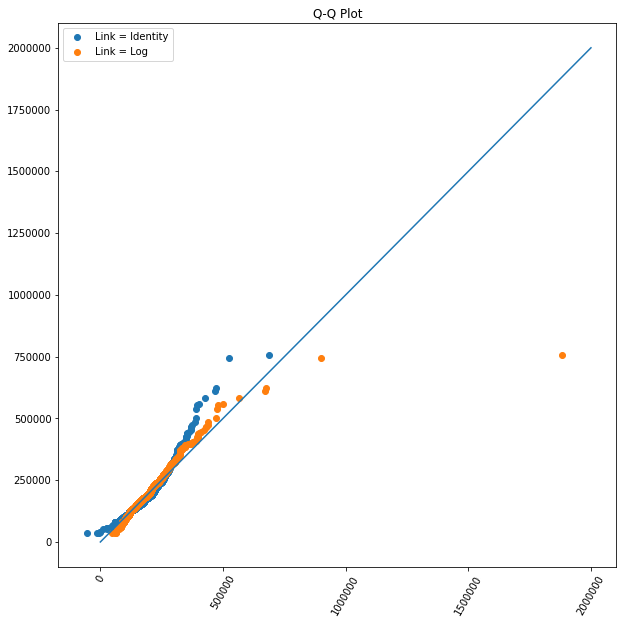

In [11]:
# Quantile-Quantile Plot
min = 0
max = 2000000
plt.figure(figsize = (10,10))
plt.plot([min,max], [min, max])
plt.scatter(np.sort(norm_data["Pred1"]),np.sort(norm_data["saleprice"]),label = "Link = Identity")
plt.scatter(np.sort(norm_data["Pred2"]),np.sort(norm_data["saleprice"]),label = "Link = Log")
plt.title("Q-Q Plot")
plt.xticks(rotation = 60)
plt.legend(loc = 'best')
plt.savefig("qq.png")
plt.show()

In [12]:
# Independent t-test SalePrice vs. predicted 1 & 2
print(stats.ttest_ind(norm_data["saleprice"], norm_data["Pred1"]))
print(stats.ttest_ind(norm_data["saleprice"], norm_data["Pred2"]))

Ttest_indResult(statistic=1.0553602080247925e-14, pvalue=0.9999999999999916)
Ttest_indResult(statistic=0.7202007576670619, pvalue=0.47145908164109485)


----
# Appendix

#### * Observations of all 79 house features


In [13]:
# Dealing with categorical data

# Import data to convert text fields to categorical fields
data1 = pd.read_csv("train.csv")
data1["ln_SalePrice"] = np.log(data1["SalePrice"])
obj_list = data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
le = LabelEncoder()

# Transforming labels and converting categorical data into dummy/indicator variables 
for i in obj_list.index:
    try:
        le.fit(data1[i])
        data1[i] = le.transform(data1[i])
    except:
        data1[i] = pd.get_dummies(data1[i])

### One-way Plots

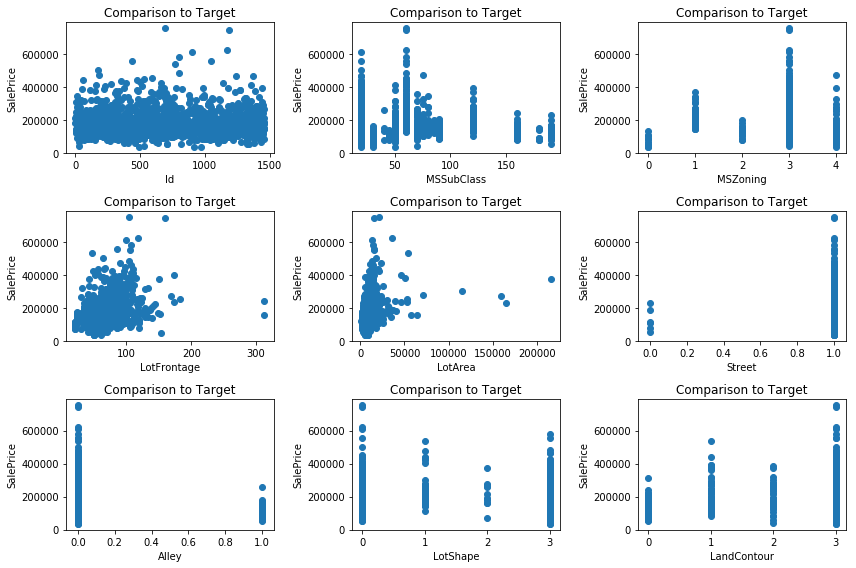

In [14]:
# Plot oneway graphs field versus target
j = 0 #select the starting field for the 9 plots
fig = plt.figure(figsize=(12,8))
target = "SalePrice"

# loop plotting
for i in range(9):
    field1 = data1.columns[j]
    oneway = data1[[field1,target]]
    plt.subplot(3,3,i+1)
    try:
        plt.scatter(oneway[field1],oneway[target])
    except:
        plt.scatter(0,0)
    plt.title("Comparison to Target")
    plt.xlabel(oneway.columns[0])
    plt.ylabel(oneway.columns[1])
    j=j+1

plt.tight_layout()
#plt.savefig("Images/Group9.png")
plt.show()

### Data Analyses - OLS one variable at a time

In [15]:
# Generalized Linear Model consistent with Ordinary least squares

#Initializing variables
dev_comp = pd.DataFrame()
fields = []
dev1 = []
dev2 = []

# Calculating Deviance
for i in range(80):
    
    # Deviance of Ln Sales Price
    form1 = "ln_SalePrice ~ " + data1.columns[i]
    fields.append(data1.columns[i])
    
    try:
        model_1 = smf.glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
        dev1.append(model_1.null_deviance - model_1.deviance)
    except:
        dev1.append(0)
    
    # Deviance of Sales Price
    form1 = "SalePrice ~ " + data.columns[i]
    try:
        model_1 = smf.glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
        dev2.append(model_1.null_deviance - model_1.deviance)
    except:
        dev2.append(0)
        
    dev_comp.append([data1.columns[i], dev1])

# Output deviance measures and rank by decending
dev_comp["Fields"] = fields
dev_comp["Dev1"] = dev1
dev_comp["Dev2"] = dev2
dev_comp = dev_comp.sort_values(by="Dev1", ascending=False)
print(dev_comp)

           Fields        Dev1          Dev2
17    OverallQual  155.462039  5.760947e+12
46      GrLivArea  114.374538  4.623740e+12
61     GarageCars  107.844935  3.776385e+12
62     GarageArea   98.627072  3.578809e+12
38    TotalBsmtSF   87.232270  3.466605e+12
49       FullBath   82.353698  2.894450e+12
19      YearBuilt   80.098477  2.517642e+12
27      ExterQual   78.899292  3.734921e+12
20   YearRemodAdd   74.475776  2.367827e+12
54   TotRmsAbvGrd   66.489519  2.622969e+12
53    KitchenQual   66.480517  3.196466e+12
59    GarageYrBlt   58.304718  2.035564e+12
56     Fireplaces   55.769899  2.007532e+12
30       BsmtQual   50.119024  2.816930e+12
26     MasVnrArea   42.951032  2.079646e+12
40      HeatingQC   42.229076  1.474574e+12
60   GarageFinish   40.847502  1.621786e+12
29     Foundation   39.532379  1.347027e+12
34     BsmtFinSF1   32.219883  1.374928e+12
41     CentralAir   28.779443  5.816255e+11
3     LotFrontage   26.306628  1.032746e+12
66     WoodDeckSF   25.991320  9

In [16]:
# Show the average Sales Price by selected fields (i)
i= 17
d1 = data1.groupby(data1.columns[i])
d1["SalePrice"].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

### Modeling: Linear Models

In [17]:
# Create formula (form1) for use in linear models
a = data1.columns[4]
b = data1.columns[17]
c = data1.columns[20]
d = data1.columns[38]
e = data1.columns[46]

# Formula 1 construction and string verification of house features involved
form1 = "SalePrice ~ " + a + " + " +  b + " + " + c + " + " + d + " + " + e
form1

'SalePrice ~ LotArea + OverallQual + YearRemodAdd + TotalBsmtSF + GrLivArea'

#### Gaussian Model

In [18]:
# GLM consistent with Ordinary least squares
model_test = smf.glm(formula = form1, data = data1,family = sm.families.Gaussian()).fit()
print(model_test.null_deviance - model_test.deviance)
print(model_test.summary())

6991790484001.785
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      1.5242e+09
Method:                          IRLS   Log-Likelihood:                -17504.
Date:                Tue, 30 Jul 2019   Deviance:                   2.2161e+12
Time:                        14:17:41   Pearson chi2:                 2.22e+12
No. Iterations:                     3   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.054e+06   1.15e+05     -9.148      0.000   -1.28e+06   -8.28e+05
LotArea          0.6950     

#### Gaussian Model - Log Link Function


In [19]:
# GLM consistent with Ordinary least squares
model_test2 = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian(link = sm.families.links.log)).fit()
print(model_test2.null_deviance - model_test2.deviance)
print(model_test2.summary())

6854812452362.34
                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1454
Model Family:                Gaussian   Df Model:                            5
Link Function:                    log   Scale:                      1.6184e+09
Method:                          IRLS   Log-Likelihood:                -17548.
Date:                Tue, 30 Jul 2019   Deviance:                   2.3531e+12
Time:                        14:17:41   Pearson chi2:                 2.35e+12
No. Iterations:                    18   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0112      0.754      5.323      0.000       2.534       5.488
LotArea       2.414e-06   4.2

### Review Outliers

In [20]:
# Outliers based on fitted differences
data1["Pred1"] = model_test.predict()
data1["Diff1"] = data1["SalePrice"] - data1["Pred1"]
data1["Pred2"] = model_test2.predict()
data1["Diff2"] = data1["SalePrice"] - data1["Pred2"]

data_model = data1[["LotArea", "OverallQual", "YearRemodAdd", "TotalBsmtSF", "GrLivArea",
                   "SalePrice", "Pred1", "Diff1", "Pred2","Diff2"]]
outliers = data_model[data_model["Diff2"].abs() > 250000]
outliers

,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,GrLivArea,SalePrice,Pred1,Diff1,Pred2,Diff2
523,40094,10,2008,3138,4676,184750,526339.003564,-341589.003564,614503.645304,-429753.645304
898,12919,9,2010,2330,2364,611657,348156.041049,263500.958951,347563.026347,264093.973653
1298,63887,10,2008,6110,5642,160000,685833.591419,-525833.591419,708473.954854,-548473.954854


#### Calcualte t statistics

In [21]:
# Independent t-test of saleprice vs. predicted 1 & 2
print(stats.ttest_ind(data1["SalePrice"],data1["Pred1"], equal_var=False))
print(stats.ttest_ind(data1["SalePrice"],data1["Pred2"], equal_var=False))

Ttest_indResult(statistic=2.1107204160495878e-14, pvalue=0.9999999999999831)
Ttest_indResult(statistic=-0.1541657212723848, pvalue=0.8774900124484029)


### Modeling with Feature Exclusion

In [22]:
# Create formula (form1) for use in linear models
a = data1.columns[4]
b = data1.columns[17]
c = data1.columns[20]
d = data1.columns[38]
e = data1.columns[46]

In [23]:
form1 = "SalePrice ~ " + b + " + " + c + " + " + d + " + " + e
model_ols_a = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + a + ": " + str(model_ols_a.deviance - model_test.deviance))

model_ols_a = smf.ols(formula = form1, data = data1).fit()
print("Comparison of R-squared: Model Excluding - " + a + ": " + str(model_ols_a.rsquared) + " to Full Model: " + str(model_ols.rsquared))

Difference of Deviance Excluding LotArea: 62271559899.08789
Comparison of R-squared: Model Excluding - LotArea: 0.7525614303057595 to Full Model: 0.7593242625742487


In [24]:
form1 = "SalePrice ~ " + a + " + " + c + " + " + d + " + " + e 
model_ols_b = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + b + ": " + str(model_ols_b.deviance - model_test.deviance))

model_ols_b = smf.ols(formula = form1, data = data1).fit()
print("Comparison of R-squared: Model Excluding - " + b + ": " + str(model_ols_b.rsquared) + " to Full Model: " + str(model_ols.rsquared))


Difference of Deviance Excluding OverallQual: 734649199077.8672
Comparison of R-squared: Model Excluding - OverallQual: 0.6795396977167957 to Full Model: 0.7593242625742487


In [25]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + d + " + " + e
model_ols_c = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + c + ": " + str(model_ols_c.deviance - model_test.deviance))


model_ols_c = smf.ols(formula = form1, data = data1).fit()
print("Comparison of R-squared: Model Excluding - " + c + ": " + str(model_ols_c.rsquared) + " to Full Model: " + str(model_ols.rsquared))


Difference of Deviance Excluding YearRemodAdd: 103105464609.51709
Comparison of R-squared: Model Excluding - YearRemodAdd: 0.7481267758845178 to Full Model: 0.7593242625742487


In [26]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + c + " + " + e
model_ols_d = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + d + ": " + str(model_ols_d.deviance - model_test.deviance))


model_ols_d = smf.ols(formula = form1, data = data1).fit()
print("Comparison of R-squared: Model Excluding - " + d + ": " + str(model_ols_d.rsquared) + " to Full Model: " + str(model_ols.rsquared))


Difference of Deviance Excluding TotalBsmtSF: 197014156826.11816
Comparison of R-squared: Model Excluding - TotalBsmtSF: 0.7379280794805219 to Full Model: 0.7593242625742487


In [27]:
form1 = "SalePrice ~ " + a + " + " + b + " + " + c + " + " + d
model_ols_e = smf.glm(formula = form1, data = data1, family = sm.families.Gaussian()).fit()
print("Difference of Deviance Excluding " + e + ": " + str(model_ols_e.deviance - model_test.deviance))


model_ols_e = smf.ols(formula = form1, data = data1).fit()
print("Comparison of R-squared: Model Excluding - " + e + ": " + str(model_ols_e.rsquared) + " to Full Model: " + str(model_ols.rsquared))


Difference of Deviance Excluding GrLivArea: 532431146541.82227
Comparison of R-squared: Model Excluding - GrLivArea: 0.7015010356562655 to Full Model: 0.7593242625742487


----